In [1]:
# EDA is used to detect patterns and relationships in data
# generate questions or hypotheses
# prepare data for machine learning

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("netflix_data.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [2]:
# does data represent the population we are studying
# check for class imbalance

df['type'].value_counts(normalize=True)

type
Movie      0.971945
TV Show    0.028055
Name: proportion, dtype: float64

In [3]:
pd.crosstab(df['country'], df['type'], values=df['duration'], aggfunc='median')

type,Movie,TV Show
country,,
Argentina,91.0,1.0
Australia,95.0,1.0
Austria,99.0,NaN
Bangladesh,115.5,NaN
Belgium,106.0,1.0
...,...,...
United States,93.0,1.0
Uruguay,74.0,NaN
Venezuela,119.0,NaN


In [4]:
# generate new features

# convert string to number

df['show_id_num'] = df['show_id'].str.replace('s', '')
df['show_id_num'] = df['show_id_num'].astype(int)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,show_id_num
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,3
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,4
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,5
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV,6


In [5]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4812 non-null   object        
 1   type          4812 non-null   object        
 2   title         4812 non-null   object        
 3   director      4812 non-null   object        
 4   cast          4812 non-null   object        
 5   country       4812 non-null   object        
 6   date_added    4812 non-null   datetime64[ns]
 7   release_year  4812 non-null   int64         
 8   duration      4812 non-null   int64         
 9   description   4812 non-null   object        
 10  genre         4812 non-null   object        
 11  show_id_num   4812 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 451.3+ KB


In [6]:
df['date_added_weekday'] = df['date_added'].dt.weekday
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,show_id_num,date_added_weekday
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2,4
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,3,3
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,4,3
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas,5,2
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV,6,5


In [13]:
# create categories

q1 = df['duration'].quantile(0.25)
q2 = df['duration'].quantile(0.50)
q3 = df['duration'].quantile(0.75) 
q4 = df['duration'].quantile(1) 

labels = ['Short','Medium','Long','Super Long']
bins = [0, q1, q2, q3, q4]

df['duration_category'] = pd.cut(df['duration'], labels=labels, bins=bins)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,show_id_num,date_added_weekday,duration_category
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2,4,Medium
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,3,3,Short
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,4,3,Short
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas,5,2,Super Long
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV,6,5,Short


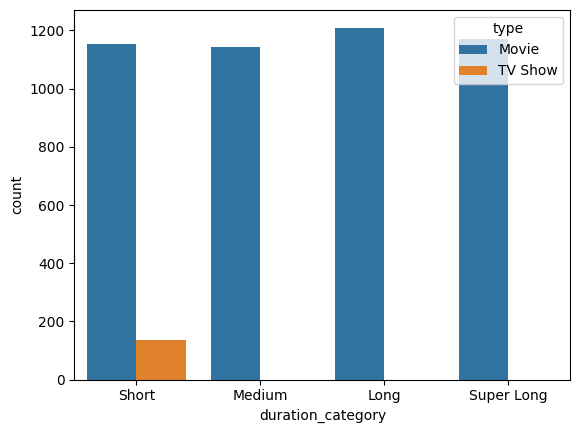

In [14]:
sns.countplot(data=df, x='duration_category', hue='type')
plt.show()

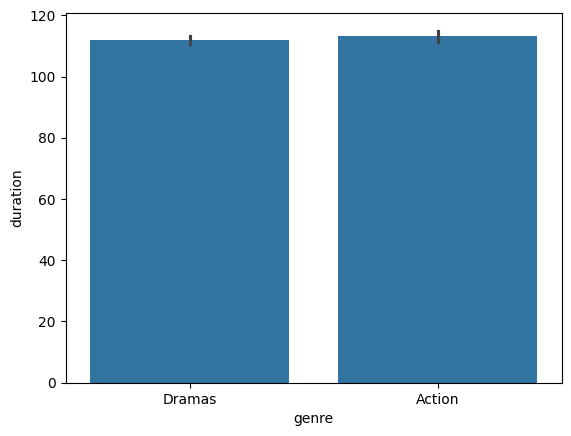

In [17]:
# generate hypothesis
# would data from different time give different results
# generate hypothesis to test
# decide which statistical test to use
# if you look at enough data and run enough tests eventually you will find a significant result

# hypothese: action movies are longer than drama
df_test = df[df['genre'].isin(['Action','Dramas'])]
sns.barplot(data=df_test, x='genre', y='duration')
plt.show()